In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
studentDataPath = "RawData/Chapter06Exercise.csv"
studentData = pd.read_csv(studentDataPath)

In [3]:
studentData.head() 

,Student_ID,First_Name,Last_Name,Gender,Grade,Tardies,Absences,Suspension,Expulsion,Arrest
0,309,Amanda,Freeman,0,12,5,7,1,1,1
1,290,Norma,Diaz,0,9,3,0,0,0,1
2,208,Doris,Gray,0,11,4,3,1,1,1
3,610,Antonio,Stephens,1,9,7,3,1,0,0
4,218,Carol,Hudson,0,11,2,0,0,0,0


In [4]:
# Get Statistics for each column
studentData.describe()

,Student_ID,Gender,Grade,Tardies,Absences,Suspension,Expulsion,Arrest
count,943.000000,943.000000,943.00000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,472.000000,0.484624,10.52386,4.177094,2.519618,0.337222,0.155885,0.718982
std,272.364951,0.500029,1.11314,3.070202,2.685059,0.473012,0.362939,0.980993
min,1.000000,0.000000,9.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,236.500000,0.000000,10.00000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,472.000000,0.000000,11.00000,4.000000,2.000000,0.000000,0.000000,0.000000
75%,707.500000,1.000000,12.00000,6.000000,4.000000,1.000000,0.000000,1.000000
max,943.000000,1.000000,12.00000,11.000000,12.000000,1.000000,1.000000,4.000000


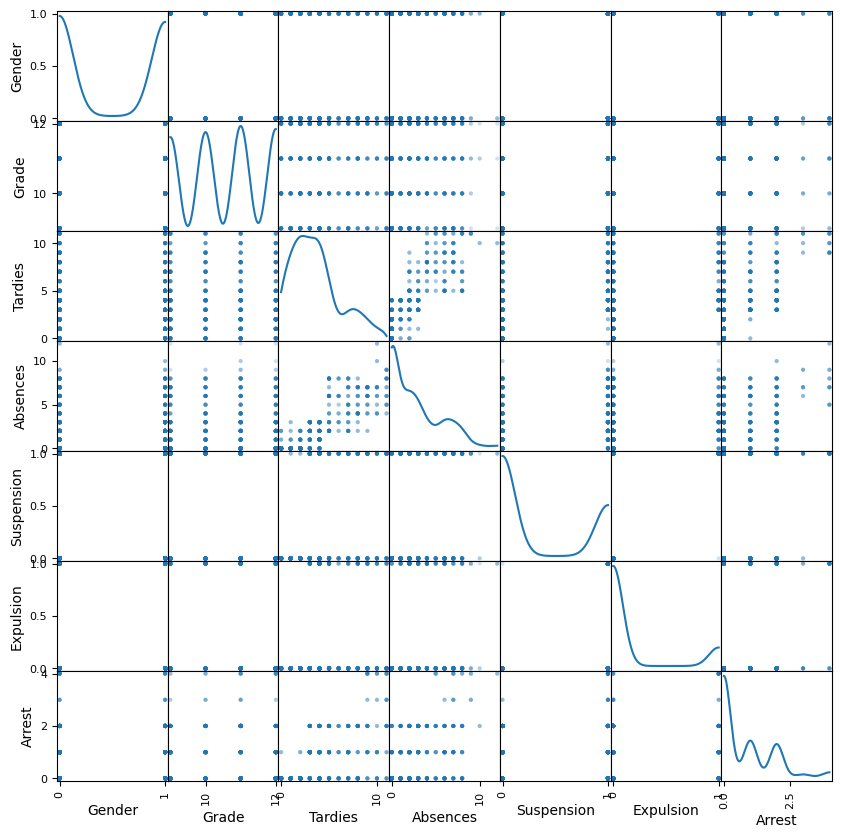

In [5]:
# Drop unique identifier
cleanStudentData = studentData.drop(['Student_ID', 'First_Name', 'Last_Name'], axis=1)
pd.plotting.scatter_matrix(cleanStudentData, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

# Interested Attribute

In [6]:
# Drop unique identifier
cleanStudentData = studentData.drop(['Student_ID', 'First_Name', 'Last_Name', 'Expulsion', 'Suspension', 'Gender', 'Grade'], axis=1)
cleanStudentData.head()

,Tardies,Absences,Arrest
0,5,7,1
1,3,0,1
2,4,3,1
3,7,3,0
4,2,0,0


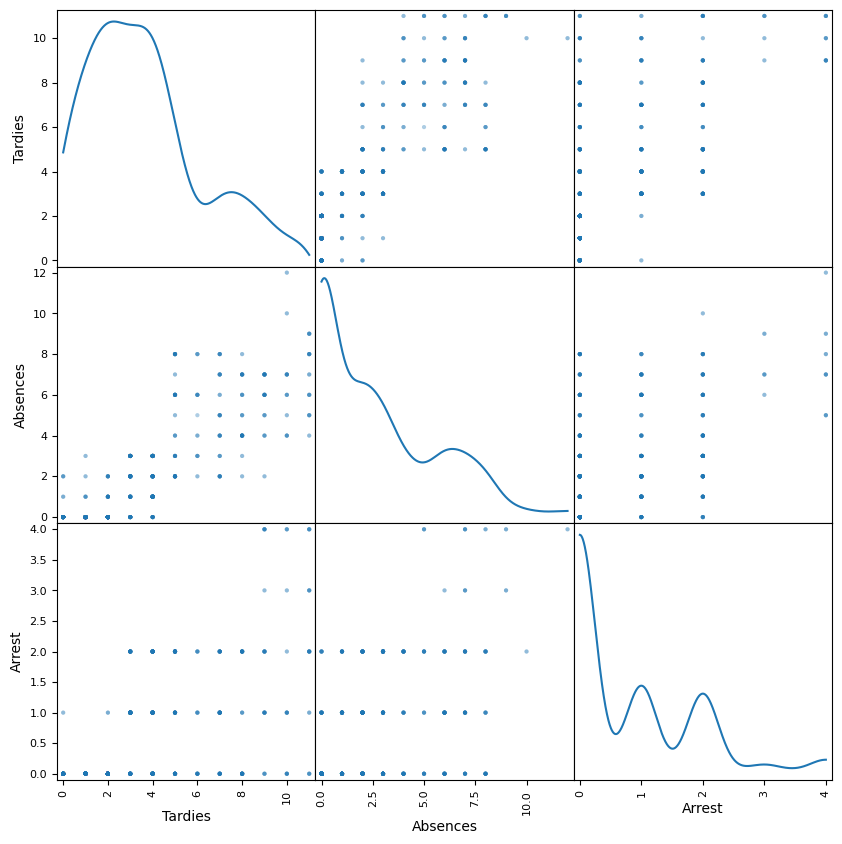

In [7]:
# Plot every relationship
pd.plotting.scatter_matrix(cleanStudentData, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

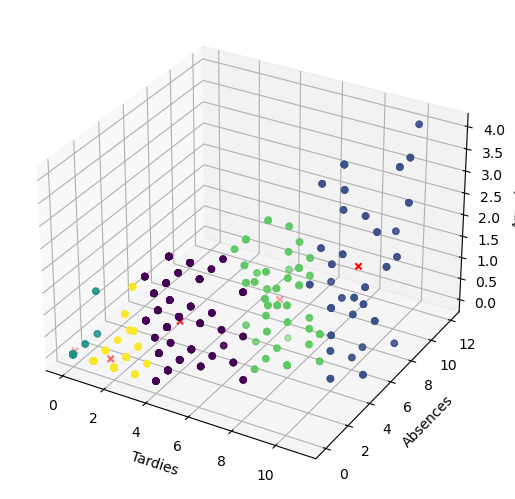

In [8]:
# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=5, n_init='auto', max_iter=300, random_state=1)

# Fit the data
kmeans.fit(cleanStudentData)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels
labels = kmeans.labels_

# Plot the data
fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)   

Tardies = cleanStudentData['Tardies']
Absences = cleanStudentData['Absences']
Arrest = cleanStudentData['Arrest']

ax.scatter(Tardies, Absences, Arrest, c=labels, marker='o')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x')


ax.set_xlabel('Tardies')
ax.set_ylabel('Absences')
ax.set_zlabel('Arrest')

plt.show()